<h1>Prediksi Tujuan Peminjaman Dana dengan K-Nearest Neighbors (KNN)</h1></center

## K-Nearest Neighbors (KNN)

__K-Nearest Neighbors__ atau yang biasa disingkat dengan __KNN__ adalah salah satu algoritma <i>supervised learning</i> yang paling sederhana. Algoritma ini bekerja mengklasifikasikan data baru berdasarkan kemiripan dengan sejumlah K tetangga terdekatnya. Dengan kata lain, data baru akan diklasifikasikan ke dalam kategori berdasarkan mayoritas kategori tetangganya.

## Dataset

Dataset <a href='https://www.kaggle.com/uciml/german-credit'>German Credit Risk</a> yang terdiri dari 1000 baris data dan 9 kolom.

__Attribute Information :__

* __Age__ (numeric)
* __Sex__ (text: male, female)
* __Job__ (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* __Housing__ (text: own, rent, or free)
* __Saving accounts__ (text - little, moderate, quite rich, rich)
* __Checking account__ (numeric, in DM - Deutsch Mark)
* __Credit amount__ (numeric, in DM)
* __Duration__ (numeric, in month)
* __Purpose__ (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

<i>import</i> <i>library</i> yang akan digunakan terlebih dahulu seperti Pandas, Numpy, Matplotlib, dan Seaborn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<i>load</i> dataset ke dalam dataframe Pandas dengan <code>read_csv()</code>.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [ ]:
# Load dataset ke dataframe Pandas

df = pd.read_csv('german_credit_data.csv')
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


kolom pertama yaitu <code>Unnamed: 0</code> tidak merepresentasikan data. Oleh karena itu akan dihapus kolom tersebut dengan <code>drop()</code> dan memberikan parameter <code>axis = 1</code> yang menandakan bahwa ingin menghapus kolom.

In [ ]:
# Menghapus kolom 'Unnamed: 0'

df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Menampilkan 5 data teratas di dataframe df

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


## Analisis dan visualisasi data

Pertama melihat jumlah data untuk masing-masing kategori di kolom target, yaitu kolom <code>Purpose</code>, dengan menggunakan <code>value_counts()</code>.

In [ ]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Purpose'

df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

melihat jumlah data untuk masing-masing kategori pada kolom lainnya yang bertipe __object__ seperti <code>Saving accounts</code>, <code>Checking account</code>, dan <code>Housing</code>.

In [ ]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Saving accounts'

df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Checking account'

df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
# Menampilkan jumlah data pada masing-masing kategori pada kolom 'Housing'

df['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

Untuk kolom yang bertipe numerik seperti integer atau float, visualisasikan dengan histogram untuk melihat sebarannya.

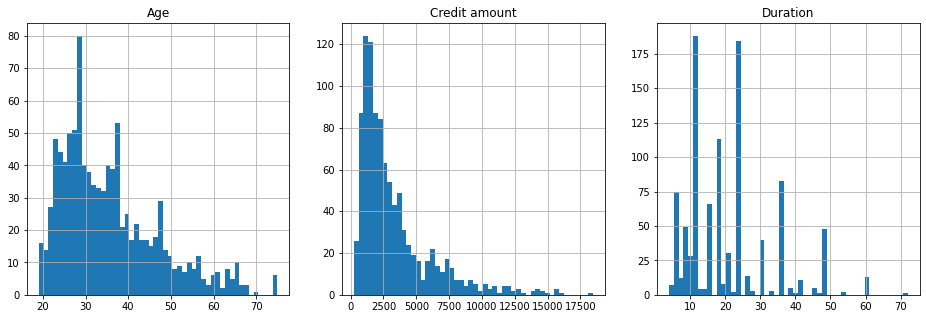

In [ ]:
# Menampilkan histogram Age, Credit amount, dan Duration

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 5)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0]) 
ax1 = fig.add_subplot(ax[1])  
ax2 = fig.add_subplot(ax[2])   

# Subplot ax[0]: Age
df.hist(column='Age', bins=50, ax=ax0)

# Subplot ax[1]: Credit amount
df.hist(column='Credit amount', bins=50, ax=ax1)

# Subplot ax[2]: Duration
df.hist(column='Duration', bins=50, ax=ax2)

plt.subplots_adjust(wspace=0.2)
plt.show()

visualisasikan jumlah data untuk tiap kategori, gunakan <code>countplot()</code> dari Seaborn seperti di bawah ini.

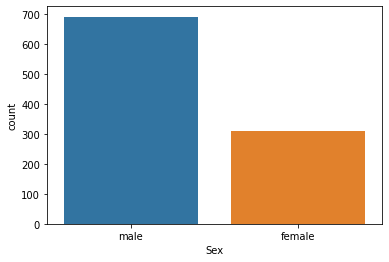

In [ ]:
# Menampilkan visualisasi perbandingan jumlah data untuk tiap jenis kelamin pada kolom 'Sex'

sns.countplot(x='Sex', data=df)

visualisasi kolom <code>Housing</code> berdasarkan kolom <code>Sex</code>.

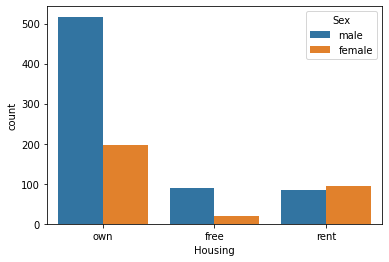

In [ ]:
# Menampilkan visualisasi perbandingan jumlah data untuk tiap jenis 'Housing' berdasarkan kolom 'Sex'

sns.countplot(x='Housing', hue='Sex', data=df)

untuk kolom <code>Purpose</code> dengan mengatur ukuran <i>figure</i> dengan Matplotlib dan warna <i>colormap</i> dengan parameter <code>palette</code>.

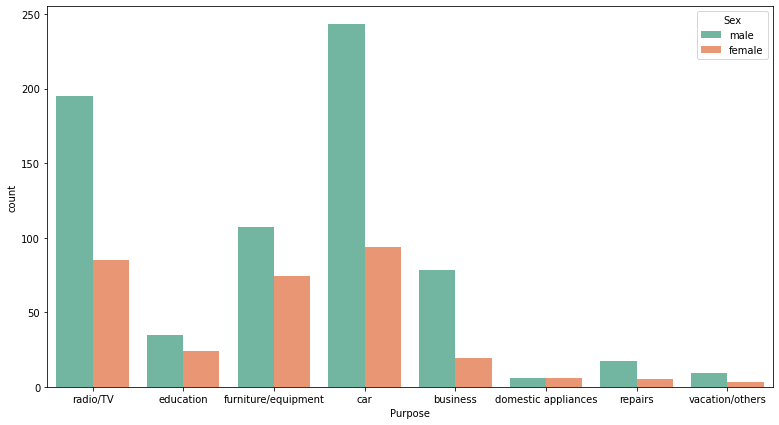

In [ ]:
# Visualisasi 'Purpose' berdasarkan 'Sex'

plt.figure(figsize=(13,7))
sns.countplot(x='Purpose', hue='Sex', data=df, palette='Set2')

visualisasi <code>Housing</code> berdasarkan <code>Purpose</code>.

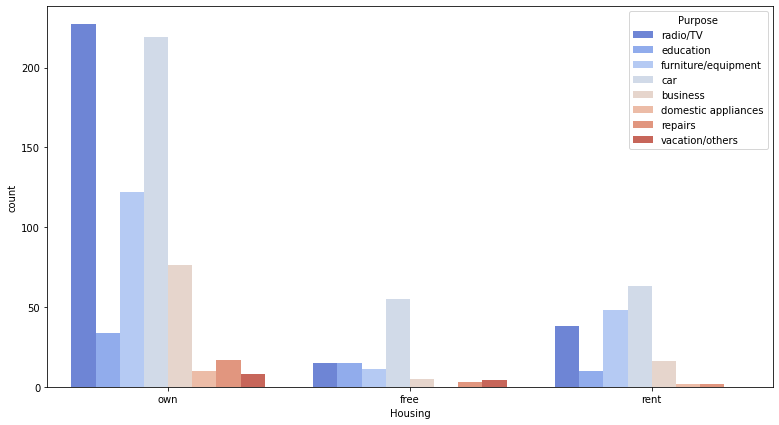

In [ ]:
# Visualisasi 'Housing' berdasarkan 'Purpose'

plt.figure(figsize=(13,7))
sns.countplot(x='Housing', hue='Purpose', data=df, palette='coolwarm')

melihat korelasi antar atribut yang memiliki nilai numerik. Untuk men-<i>generate</i> korelasi, gunakan <code>corr()</code>, setelah itu tampilkan korelasi tersebut pada <i>heatmap</i> 

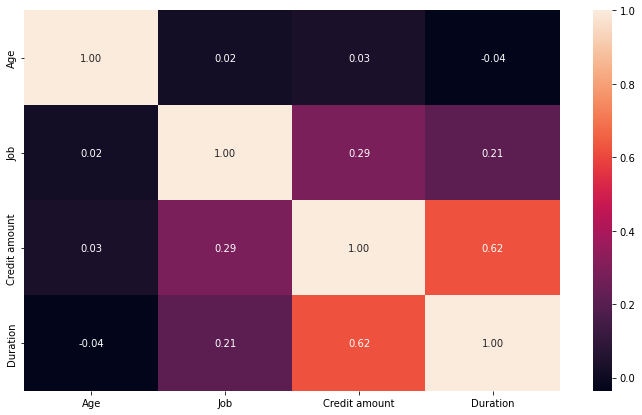

In [ ]:
# Menampilkan korelasi antar atribut dengan Heatmap

plt.figure(figsize=(12,7))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

menampilkan <code>pairplot()</code> dengan Seaborn.

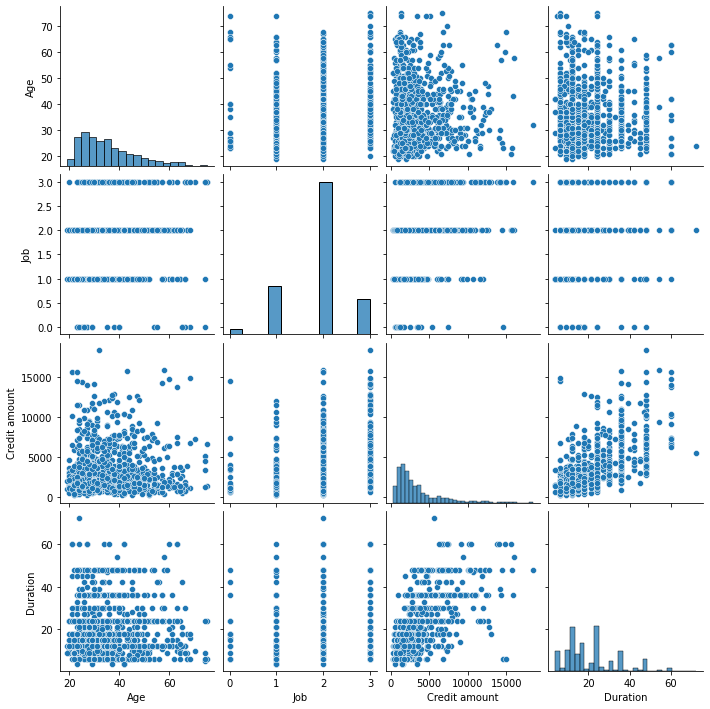

In [ ]:
sns.pairplot(df)

## Preprocessing

<i>Data preparation</i> atau <i>preprocessing</i> sangat perlu dilakukan sebelum melakukan pemodelan. Pada umumnya, yang dicek pertama kali adalah info singkat dari dataset yang sedang dikerjakan dengan <code>info()</code>. lihat apakah ada missing values atau nilai yang <i>null</i> pada dataframe dan juga tipe datanya.

In [ ]:
# Menampilkan info dataframe df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


dari 1000 baris data ada 2 kolom yang jumlah nilai <i>non-null</i>-nya tidak sampai 1000, yaitu kolom <code>Saving accounts</code> dan <code>Checking account</code>. Itu berarti ada <i>missing values</i>. isi nilai <i>null</i> tersebut dengan nilai __'little'__ yang merupakan nilai terbanyak pada 2 kolom tersebut dengan <i>method</i> <code>fillna()</code>.

In [ ]:
# Menangani missing values 

df['Saving accounts'].fillna('little', inplace=True)
df['Checking account'].fillna('little', inplace=True)

In [ ]:
# Menampilkan info dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


pisahkan kolom fitur dan kolom target. Kolom target adalah kolom <code>Purpose</code>, sedangkan sisanya merupakan kolom fitur.

In [ ]:
# Mendefinisikan kolom fitur dan target

df_features = df.drop('Purpose', axis=1)
df_target = df['Purpose']

In [ ]:
# Menampilkan kolom fitur

df_features

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,little,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,little,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24
...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12
996,40,male,3,own,little,little,3857,30
997,38,male,2,own,little,little,804,12
998,23,male,2,free,little,little,1845,45


### Encoding

<i>Encoding</i> terhadap data yang memiliki nilai kategori seperti pada kolom <code>Sex</code>, <code>Housing</code>, <code>Saving accounts</code>, dan <code>Checking account</code> gunakan atribut Pandas <code>.cat.codes</code>.

dari hasil <code>info()</code>, tipe data untuk kolom-kolom tersebut adalah <i>object</i>, sementara <code>.cat.codes</code> hanya dapat diaplikasikan pada kolom dengan tipe __category__. Karena itu, harus mengubah dulu tipe data dari kolom-kolom tersebut dengan <i>method</i> <code>astype()</code>. Perhatikan kode berikut.

In [ ]:
# Mengubah tipe data menjadi category
df_features[['Sex', 'Housing', 'Saving accounts', 'Checking account']] = df_features[['Sex', 'Housing', 'Saving accounts', 'Checking account']].astype('category')

# Cek hasil perubahan tipe data
df_features[['Sex','Housing', 'Saving accounts', 'Checking account']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Sex               1000 non-null   category
 1   Housing           1000 non-null   category
 2   Saving accounts   1000 non-null   category
 3   Checking account  1000 non-null   category
dtypes: category(4)
memory usage: 4.6 KB


Setelah tipe data diubah menjadi <i>category</i>, aplikasikan atribut <code>.cat.codes</code> untuk tiap kolom seperti di bawah ini.

In [ ]:
# Encoding data dengan .cat.codes

df_features['Sex'] = df_features['Sex'].cat.codes
df_features['Housing'] = df_features['Housing'].cat.codes
df_features['Saving accounts'] = df_features['Saving accounts'].cat.codes
df_features['Checking account'] = df_features['Checking account'].cat.codes

hasil <i>encoding</i>-nya.

In [ ]:
# Menampilkan 5 data terbawah

df_features.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
995,31,0,1,1,0,0,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,0,804,12
998,23,1,2,0,0,0,1845,45
999,27,1,2,1,1,1,4576,45


### Normalisasi

Selisih nilai antarkolom terlalu jauh, seperti pada kolom <code>Credit amount</code> yang memiliki nilai ratusan dan ribuan, sementara kolom lainnya bernilai satuan dan ada pula yang puluhan. Agar hasil model nantinya dapat lebih maksimal, sebaiknya menormalisasi terlebih dahulu dataframe tersebut sehingga nilai antarkolomnya tidak berbeda jauh.

lakukan normalisasi dengan <code>StandardScaler()</code> dari Scikit-Learn.

In [ ]:
# Normalisasi data

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(df_features).transform(df_features.astype(float))
X[0:5]

array([[ 2.76645648,  0.67028006,  0.14694918, -0.13371046, -0.4634091 ,
        -0.65383104, -0.74513141, -1.23647786],
       [-1.19140394, -1.49191369,  0.14694918, -0.13371046, -0.4634091 ,
         1.00143742,  0.94981679,  2.24819436],
       [ 1.18331231,  0.67028006, -1.38377145, -0.13371046, -0.4634091 ,
        -0.65383104, -0.41656241, -0.73866754],
       [ 0.8315025 ,  0.67028006,  0.14694918, -2.01695631, -0.4634091 ,
        -0.65383104,  1.63424694,  1.75038404],
       [ 1.53512213,  0.67028006,  0.14694918, -2.01695631, -0.4634091 ,
        -0.65383104,  0.5666635 ,  0.25695309]])

Data fitur sudah siap digunakan dan disimpan dalam variabel <code>X</code>. Sekarang definisikan data targetnya, masukkan dalam variabel <code>y</code>.

In [ ]:
# Mendefinisikan data target

y = df_target
y[0:5]

0               radio/TV
1               radio/TV
2              education
3    furniture/equipment
4                    car
Name: Purpose, dtype: object

### Train test split

Setelah data fitur dan target telah siap digunakan untuk pemodelan, tahap selanjutnya adalah membagi data tersebut menjadi <i>training data</i> dan <i>testing data</i>. gunakan <code>train_test_split()</code> dari Scikit-Learn.

__Train test split__ membagi data menjadi <i>training data</i> yang digunakan untuk melatih model <i>machine learning</i> dan <i>testing data</i> yang digunakan untuk mengevaluasi kinerja <i>machine learning</i>.

proporsi untuk data testing sebesar __20%__ yang didefinisikan pada parameter <code>test_size = 0.2</code>.

In [ ]:
# Train test split untuk membagi data training dan testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 8) (800,)
Test set: (200, 8) (200,)


<hr>

## Modeling

### Klasifikasi dengan K-Nearest Neighbors (KNN)

<i>import</i> dulu <i>library</i>-nya.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Misal tentukan jumlah tetangganya adalah __5__. Maka algoritma KNN akan mencari jumlah mayoritas kategori target dari 5 tetangga terdekat masing-masing data baru untuk kemudian mengklasifikasikan data baru tersebut ke dalam kategori yang mayoritas.

In [ ]:
k = 5

# Train Model
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
model_knn

NameError: ignored

### Prediksi

Setelah dilakukan <i>training</i> terhadap data latih <code>X_train</code> dan <code>y_train</code>, selanjutnya uji menggunakan data testing <code>X_test</code> dengan <i>method</i> <code>predict()</code>.

In [ ]:
# Menguji model dengan data testing

y_pred = model_knn.predict(X_test)
y_pred[0:5]

array(['furniture/equipment', 'radio/TV', 'radio/TV', 'radio/TV',
       'radio/TV'], dtype=object)

hasil pengujian model disimpan pada variabel <code>y_pred</code>.

Sebagai perbandingan, tampilkan nilai target sesungguhnya, yaitu <code>y_test</code>.

In [ ]:
# Menampilkan data testing

y_test[0:5]

841         car
956    radio/TV
544         car
173    radio/TV
759         car
Name: Purpose, dtype: object

### Evaluasi

Untuk mengevaluasi kinerja model <i>machine learning</i>, gunakan <code>accuracy_score()</code> 

In [ ]:
# Mengukur kinerja model machine learning

from sklearn.metrics import accuracy_score

print('Akurasi Train set: ', accuracy_score(y_train, model_knn.predict(X_train)))
print('Akurasi Test set: ', accuracy_score(y_test, y_pred))

Akurasi Train set:  0.535
Akurasi Test set:  0.375


### Mencari nilai K terbaik

Pada contoh di atas, nilai <code>K</code> yang akan digunakan ditentukan sendiri. Perbedaan nilai <code>K</code> atau jumlah tetangga sangat menentukan akurasi model. Oleh karena itu, sebaiknya membuat model dengan mencari nilai <code>K</code> yang dapat menghasilkan akurasi terbaik.

Misal mencari nilai <code>K</code> terbaik dari 1 sampai 14.

In [ ]:
# Mencari nilai K dengan akurasi terbaik

Ks = 15
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    #Train Model and Predict  
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    
    mean_acc[n-1] = accuracy_score(y_test, y_pred)

mean_acc

array([0.275, 0.285, 0.34 , 0.38 , 0.375, 0.405, 0.42 , 0.405, 0.425,
       0.43 , 0.435, 0.435, 0.45 , 0.43 ])

visualisasikan hasil tersebut dengan <i>line plot</i> seperti di bawah ini.

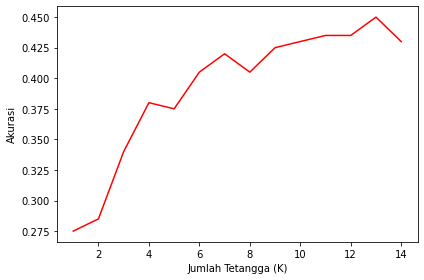

In [ ]:
# Visualisasi hasil K 

plt.plot(range(1,Ks), mean_acc, 'r')
plt.ylabel('Akurasi')
plt.xlabel('Jumlah Tetangga (K)')
plt.tight_layout()
plt.show()

In [ ]:
# Print akurasi terbaik

print( 'Akurasi terbaik adalah ', mean_acc.max(), 'dengan nilai k =', mean_acc.argmax()+1)

Akurasi terbaik adalah  0.45 dengan nilai k = 13


untuk dataset ini dengan menggunakan algoritma KNN, nilai K yang menghasilkan akurasi terbaik untuk data testing adalah K = 13 dengan akurasi 0.45.



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


